# Implementing CNN network with a pretrained model

**import libs/dependencies**

In [2]:
import numpy as np
import cv2

import PIL
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from keras import layers
from keras import models

from google.colab import files

**Initialise shape of image**

In [1]:
IMAGE_SHAPE = (224,224)

## Select a pre-trained model
Note: this section is optional. It's for testing the use of the selected model.

Instructions (upload button at the bottom):
1. Upload a random picture of a toucan from online (save as: "toucan.jpg")
2. Upload a random picture of an earthstar from online (save as: "earthstar.jpg")
3. Upload the labels txt file the model was trained on: [text labels](https://download.tensorflow.org/data/ImageNetLabels.txt) (save as: "ImageNetLabels.txt" which is the default name)

Note: by default data should be saved under /content (the PWD)

Model should successfully predict the uploaded images to be toucan and earthstar accordingly

In [3]:

classifier = tf.keras.models.Sequential([
                                         # with a depth multiplier of 1.0 and an input size of 224x224 pixels and 3 channels
                                         hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE + (3,))
])

files.upload()

earthstar = PIL.Image.open('earthstar.jpg').resize(IMAGE_SHAPE)
toucan = PIL.Image.open('toucan.jpg').resize(IMAGE_SHAPE)
earthstar = np.array(earthstar)/255.0
toucan = np.array(toucan)/255.0

# earthstar[np.newaxis, ...]

result_earthstar = classifier.predict(earthstar[np.newaxis, ...]) # classifier expects an array of images (in numpy form) as input 
result_toucan = classifier.predict(toucan[np.newaxis, ...])
predicted_label_earthstar = np.argmax(result_earthstar)
predicted_label_toucan = np.argmax(result_toucan)

image_labels = []
with open('ImageNetLabels.txt', 'r') as f:
  image_labels = f.read().splitlines()
# image_labels[:10] # observe what this line does

print("Predicted results for earthstar.jpg: " + image_labels[predicted_label_earthstar])
print("Predicted results for toucan.jpg: " + image_labels[predicted_label_toucan])

Saving earthstar.jpg to earthstar.jpg
Saving ImageNetLabels.txt to ImageNetLabels.txt
Saving toucan.jpg to toucan.jpg
Predicted results for earthstar: earthstar
Predicted results for toucan: toucan


## Get primary dataset to test model on
Note data used is a dataset of [flowers](http://download.tensorflow.org/example_images/flower_photos.tgz)

In [7]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, cache_dir='.', untar=True)

228827136/228813984 [==============================] - 1s 0us/step


## Classify images based on flower type & define labels

In [8]:
import pathlib
data_dir = pathlib.Path(data_dir)
flowers_images = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

**Flower labels & classes**

In [9]:
flower_labels = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}
classes = {
    0: 'roses',
    1: 'daisy',
    2: 'dandelion',
    3: 'sunflowers',
    4: 'tulips'
}

## Reshape images

In [10]:
X, y = [], []
for flower_name, images in flowers_images.items():
  for image in images:
    img = cv2.imread(str(image))
    resized = cv2.resize(img, IMAGE_SHAPE)
    X.append(resized)
    y.append(flower_labels[flower_name])

In [11]:
X = np.array(X)
y = np.array(y)
X = X/255


## Custom plot function

Sample run: 


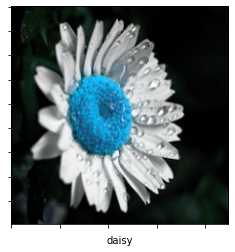

In [13]:
# X - List of images
# y - List of corresponding result labels
# index - display the image at the specified index
def plot(X, y, index):
  plt.imshow(X[index])
  ax = plt.gca()
  ax.axes.xaxis.set_ticklabels([])
  ax.axes.yaxis.set_ticklabels([])
  plt.xlabel(classes[y[index]])
print("Sample run: ")
plot(X, y, 777)

## Get test & train dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Transfer Learning model

Note that despite the reduced nubmer of epochs, the success rate in classification is almost similar, if not better, than previously. 

Network had been trained and only need a few epochs to customise its weights to the dataset.



In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable=False)

cnn_tl = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(5)
])
cnn_tl.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

cnn_tl.fit(X_train, y_train, epochs = 7)



In [ ]:
cnn_tl.evaluate(X_test, y_test)